In [239]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [240]:
image = imread("test images/Egypt.Giza.Sphinx.01.jpg")
image.shape

(150, 200, 3)

In [241]:
a = np.array([
    [0.412453,0.35758,0.180423],
    [0.212671,0.715160,0.072169],
    [0.019334,0.119193,0.950227]])
a

array([[0.412453, 0.35758 , 0.180423],
       [0.212671, 0.71516 , 0.072169],
       [0.019334, 0.119193, 0.950227]])

In [242]:
R = image[...,0]/255.0
G = image[...,1]/255.0
B = image[...,2]/255.0

In [243]:
R

array([[0.49411765, 0.48627451, 0.47843137, ..., 0.41960784, 0.41568627,
        0.41176471],
       [0.49019608, 0.48235294, 0.48627451, ..., 0.42352941, 0.41960784,
        0.41960784],
       [0.48627451, 0.48235294, 0.49019608, ..., 0.41960784, 0.41960784,
        0.41960784],
       ...,
       [0.25490196, 0.20392157, 0.20784314, ..., 0.84705882, 0.88627451,
        0.78823529],
       [0.40784314, 0.3372549 , 0.30196078, ..., 0.8       , 0.74901961,
        0.82745098],
       [0.50196078, 0.47843137, 0.43529412, ..., 0.65098039, 0.47058824,
        0.60392157]])

In [244]:
D = np.array([])
for i in a:
    m = (i[0]*R)+(i[1]*G)+(i[2]*B)
    D = np.append(D,m)

In [245]:
D.size/3

30000.0

In [246]:
D = D.reshape((-1,3))
D

array([[0.59003746, 0.58258291, 0.57512835],
       [0.57885563, 0.57512835, 0.57140107],
       [0.57140107, 0.57885563, 0.57905801],
       ...,
       [0.20303723, 0.10273924, 0.02092151],
       [0.28781064, 0.5715508 , 0.52606253],
       [0.56759646, 0.38563187, 0.53965411]])

In [247]:
X = D[...,0]
Y = D[...,1]
Z = D[...,2]

In [248]:
L = np.zeros_like(Y)

In [249]:
Y

array([0.58258291, 0.57512835, 0.57885563, ..., 0.10273924, 0.5715508 ,
       0.38563187])

In [250]:
for i in np.arange(len(Y)):
    if (Y[i] > 0.008856):
        L[i] = (116*((Y[i])**(1/3)))-16
    else:
        L[i] = (903.3)*Y[i]

In [251]:
L.max()

103.23246619699701

In [252]:
u_n = 0.19793943
v_n = 0.46831096

In [253]:
denom = X + 15*Y + 3*Z
u_m = 4*X / denom
v_m = 9*Y / denom

In [254]:
u = 13*L * (u_m - u_n)
v = 13*L * (v_m - v_n)

In [255]:
u.min()

-241.7548655368173

In [256]:
v = v.reshape((image.shape[0],image.shape[1]))
u = u.reshape((image.shape[0],image.shape[1])) 
L = L.reshape((image.shape[0],image.shape[1])) 
L.shape

(150, 200)

In [257]:
np.count_nonzero(L[0]==L[4])
# L[0].size

0

In [258]:
u

array([[  16.36956885,   14.74535305,   10.49319122, ...,   14.90336139,
          14.44730296,   12.69264629],
       [  14.35129172,   13.58926926,   12.04896998, ...,   17.74978298,
          12.83627152,   14.44730296],
       [  15.95106485,   13.5910291 ,   11.2042447 , ...,    1.94176043,
          16.41950583,   10.64656738],
       ...,
       [ -26.48044087,  105.97334881,   25.05599598, ...,   34.84068339,
        -203.90115603,    5.98636262],
       [ -25.68801761,    7.82918669,  -27.66933073, ...,  210.21410094,
        -100.15304913,   26.44913151],
       [  68.14398933,  -41.62503428,  -30.46918801, ...,  125.33560284,
         -91.46968527,   77.30060596]])

In [259]:
# Combine L, u, v into LUV image
luv_image = np.zeros_like(image)
luv_image[..., 0] = L
luv_image[..., 1] = u
luv_image[..., 2] = v

In [260]:
# luv_image = np.zeros_like(image)

# for i in np.arange(image.shape[0]):
#     for j in np.arange(image.shape[1]):
#         luv_image[i][j] = [L[i][j],u[i][j],v[i][j]]
# luv_image

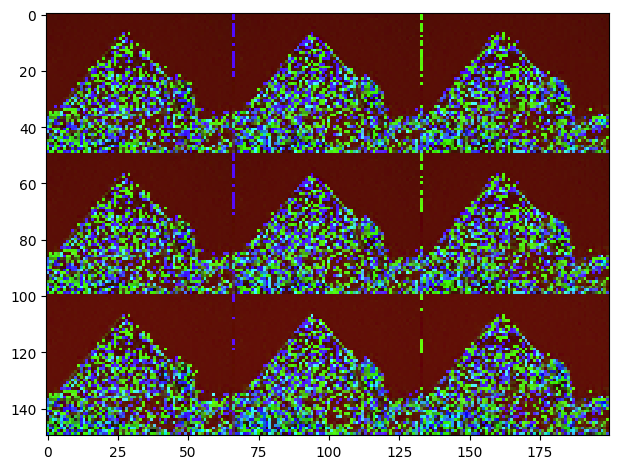

In [261]:
imshow(luv_image)

In [262]:
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

def rgb_to_luv_man(image):
    a = np.array([
    [0.412453,0.35758,0.180423],
    [0.212671,0.715160,0.072169],
    [0.019334,0.119193,0.950227]])
    
    R = image[...,0]/255.0
    G = image[...,1]/255.0
    B = image[...,2]/255.0

    D = np.array([])
    for i in a:
        m = (i[0]*R)+(i[1]*G)+(i[2]*B)
        D = np.append(D,m)

    D = D.reshape((-1,3))
    X = D[...,0]
    Y = D[...,1]
    Z = D[...,2]
    
    L = np.zeros_like(Y)
    for i in np.arange(len(Y)):
        if (Y[i] > 0.008856):
            L[i] = 116*((Y[i])**(1/3))-16
        else:
            L[i] = (903.3)*Y[i]
    
    u_n = 0.19793943
    v_n = 0.46831096
    denom = X + 15*Y + 3*Z
    u_m = 4 * X / denom
    v_m = 9 * Y / denom

    u = 13 * L * (u_m - u_n)
    v = 13 * L * (v_m - v_n)

    v = v.reshape((image.shape[0],image.shape[1]))
    u = u.reshape((image.shape[0],image.shape[1]))
    L = L.reshape((image.shape[0],image.shape[1]))

    # Combine L, u, v into LUV image
    luv_image = np.zeros_like(image)
    luv_image[..., 0] = L
    luv_image[..., 1] = u
    luv_image[..., 2] = v
    
    return luv_image

In [263]:
# Chatgpt code

import numpy as np

def rgb_to_luv(rgb_image):
    # Accessing the R,G,B channels in the image and normalizing it
    R = rgb_image[..., 0] / 255.0
    G = rgb_image[..., 1] / 255.0
    B = rgb_image[..., 2] / 255.0
    
    # Constants for XYZ to LUV conversion
    X_n = 0.5
    Y_n = 0.5
    Z_n = 0.5

    # Constants for LUV conversion
    u_n = (4*X_n) / (X_n + 15*Y_n + 3*Z_n)
    v_n = (9*Y_n) / (X_n + 15*Y_n + 3*Z_n)

    # Convert RGB image to XYZ color space
    X = 0.412453*R + 0.357580*G + 0.180423*B
    Y = 0.212671*R + 0.715160*G + 0.072169*B
    Z = 0.019334*R + 0.119193*G + 0.950227*B

    # Convert XYZ to LUV color space
    denom = X + 15*Y + 3*Z
    u_d = ((4*X) / denom)
    v_d = ((9*Y) / denom)
    L = 116 * (((Y/Y_n) ** (1/3)) - 1)
    u = 13 * L * (u_d - u_n)
    v = 13 * L * (v_d - v_n)

    # Combine L, u, v into LUV image
    luv_image = np.zeros_like(rgb_image)
    luv_image[..., 0] = L
    luv_image[..., 1] = u
    luv_image[..., 2] = v

    return luv_image


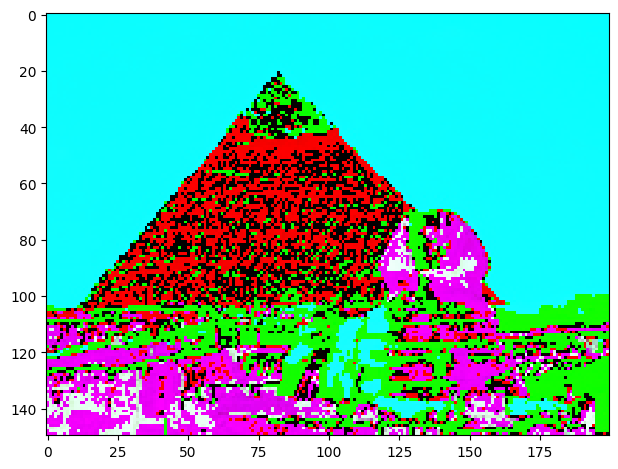

In [264]:
imshow(rgb_to_luv(image))

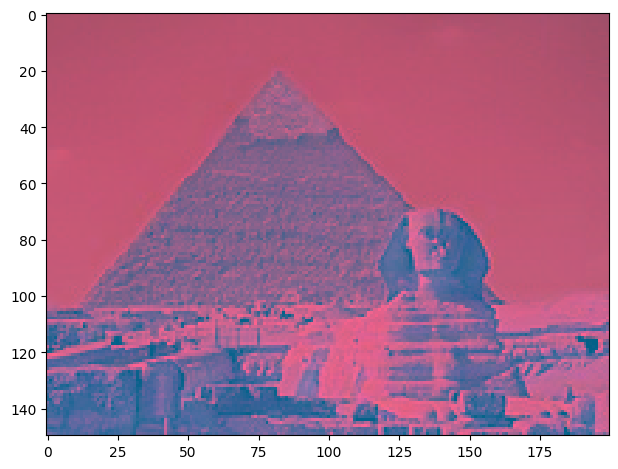

In [265]:
# test code
import cv2

# Convert RGB image to LUV color space
luv_image_cv = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)

# Display the LUV image
imshow(luv_image_cv)